In [30]:
import pandas as pd

# Reload the CSV file
df = pd.read_csv('2023_final_rearranged.csv')

# Display the first few rows of the DataFrame
print(df.head())


  Country name Continent  Ladder score  Standard error of ladder score  \
0      Finland    Europe         7.804                           0.036   
1      Denmark    Europe         7.586                           0.041   
2      Iceland    Europe         7.530                           0.049   
3       Israel      Asia         7.473                           0.032   
4  Netherlands    Europe         7.403                           0.029   

   upperwhisker  lowerwhisker  Logged GDP per capita  Social support  \
0         7.875         7.733                 10.792           0.969   
1         7.667         7.506                 10.962           0.954   
2         7.625         7.434                 10.896           0.983   
3         7.535         7.411                 10.639           0.943   
4         7.460         7.346                 10.942           0.930   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                   71.150                        

In [31]:
null_values = df.isnull().sum()
print("Null Values in Each Column:")
print(null_values)


Null Values in Each Column:
Country name                                  0
Continent                                     9
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       1
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           1
dtype: int64

In [32]:
# Check for null values in the 'Continent' column
null_continent = df[df['Continent'].isnull()]

# Print the rows with null values in the 'Continent' column
print("Null values in the 'Continent' column:")
print(null_continent)


Null values in the 'Continent' column:
                  Country name Continent  Ladder score  \
26    Taiwan Province of China       NaN         6.535   
33                      Kosovo       NaN         6.368   
81   Hong Kong S.A.R. of China       NaN         5.308   
85         Congo (Brazzaville)       NaN         5.267   
86             North Macedonia       NaN         5.254   
98          State of Palestine       NaN         4.908   
103               Burkina Faso       NaN         4.638   
105                    Turkiye       NaN         4.614   
116                    Myanmar       NaN         4.372   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
26                            0.047         6.627         6.444   
33                            0.060         6.485         6.250   
81                            0.048         5.403         5.214   
85                            0.088         5.440         5.094   
86                            0.055         5

In [33]:
# Manually assign continents based on geographical location
country_continent_mapping = {
    'Taiwan Province of China': 'Asia',
    'Kosovo': 'Europe',
    'Hong Kong S.A.R. of China': 'Asia',
    'Congo (Brazzaville)': 'Africa',
    'North Macedonia': 'Europe',
    'State of Palestine': 'Asia',
    'Burkina Faso': 'Africa',
    'Turkiye': 'Europe',  # Assuming 'Turkiye' refers to Turkey
    'Myanmar': 'Asia'
}

# Fill missing values in the 'Continent' column using the mapping
df['Continent'] = df['Continent'].fillna(df['Country name'].map(country_continent_mapping))

# Check if there are still any null values in the 'Continent' column
null_continent = df[df['Continent'].isnull()]
print("Remaining null values in the 'Continent' column:")
print(null_continent[['Country name', 'Continent']])


Remaining null values in the 'Continent' column:
Empty DataFrame
Columns: [Country name, Continent]
Index: []


In [34]:
import pandas as pd

# Load the dataset
df = pd.read_csv('2023_final.csv')

# Print the shape of the dataset
print("Shape of the dataset:")
print(df.shape)
print()

# Print info of the dataset
print("Info of the dataset:")
print(df.info())
print()

# Print description of the dataset
print("Description of the dataset:")
print(df.describe())
print()

# Check for null values in each column
print("Null Values in Each Column:")
print(df.isnull().sum())
print()

# Print null values in the 'Continent' column
print("Null values in the 'Continent' column:")
print(df[df['Continent'].isnull()][['Country name', 'Continent']])


Shape of the dataset:
(137, 20)

Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                       

In [35]:
# Print unique values in 'Country name' column where 'Continent' is null
print(df[df['Continent'].isnull()]['Country name'].unique())


['Taiwan Province of China' 'Kosovo' 'Hong Kong S.A.R. of China'
 'Congo (Brazzaville)' 'North Macedonia' 'State of Palestine'
 'Burkina Faso' 'Turkiye' 'Myanmar' 'Congo (Kinshasa)']


In [36]:
# Define a dictionary mapping countries to their continents
country_to_continent = {
    'Taiwan Province of China': 'Asia',
    'Kosovo': 'Europe',
    'Hong Kong S.A.R. of China': 'Asia',
    'Congo (Brazzaville)': 'Africa',
    'North Macedonia': 'Europe',
    'State of Palestine': 'Asia',
    'Burkina Faso': 'Africa',
    'Turkiye': 'Asia',
    'Myanmar': 'Asia',
    'Congo (Kinshasa)': 'Africa'
}

# Update the 'Continent' column with the mapped continents
for country, continent in country_to_continent.items():
    df.loc[df['Country name'] == country, 'Continent'] = continent

# Check if there are any remaining null values in the 'Continent' column
remaining_nulls = df[df['Continent'].isnull()]
print(remaining_nulls[['Country name', 'Continent']])


Empty DataFrame
Columns: [Country name, Continent]
Index: []


In [37]:
# Update the 'Continent' column in the DataFrame
for country, continent in country_to_continent.items():
    df.loc[df['Country name'] == country, 'Continent'] = continent

# Save the updated DataFrame to a new CSV file
df.to_csv('2023_final.csv', index=False)


In [38]:
# Check for null values in the 'Continent' column
null_continent = df[df['Continent'].isnull()]
print(null_continent)


Empty DataFrame
Columns: [Country name, Ladder score, Standard error of ladder score, upperwhisker, lowerwhisker, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Ladder score in Dystopia, Explained by: Log GDP per capita, Explained by: Social support, Explained by: Healthy life expectancy, Explained by: Freedom to make life choices, Explained by: Generosity, Explained by: Perceptions of corruption, Dystopia + residual, Continent]
Index: []


In [39]:
# Sort the DataFrame by 'Ladder score' column in descending order to get the top happiest countries
top_happiness_countries = df.sort_values(by='Ladder score', ascending=False)

# Select the columns 'Country name', 'Ladder score', and 'Continent' for display
top_happiness_countries = top_happiness_countries[['Country name', 'Ladder score', 'Continent']]

# Display the top 10 happiest countries along with their ladder scores and continents
print(top_happiness_countries.head(10))


  Country name  Ladder score Continent
0      Finland         7.804    Europe
1      Denmark         7.586    Europe
2      Iceland         7.530    Europe
3       Israel         7.473      Asia
4  Netherlands         7.403    Europe
5       Sweden         7.395    Europe
6       Norway         7.315    Europe
7  Switzerland         7.240    Europe
8   Luxembourg         7.228    Europe
9  New Zealand         7.123   Oceania


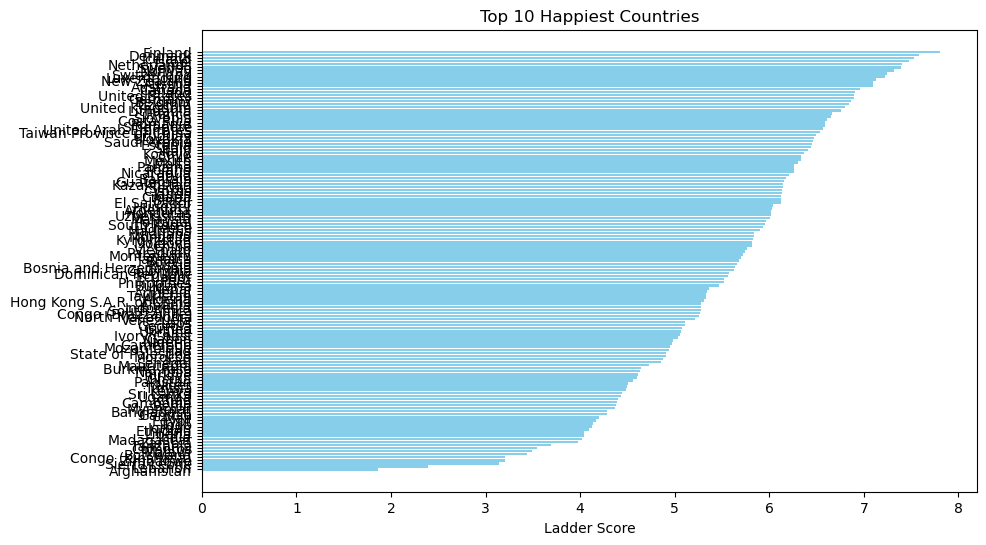

In [40]:
import matplotlib.pyplot as plt

# Data
countries = top_happiness_countries['Country name']
scores = top_happiness_countries['Ladder score']

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(countries, scores, color='skyblue')
plt.xlabel('Ladder Score')
plt.title('Top 10 Happiest Countries')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest score at the top
plt.show()


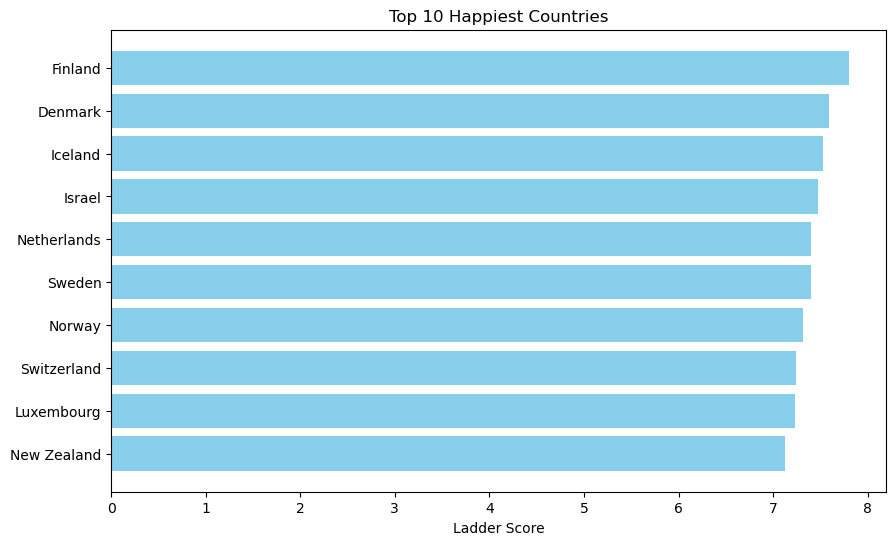

In [41]:
import matplotlib.pyplot as plt

# Data for top 10 happiest countries
top_10_countries = top_happiness_countries.head(10)
countries = top_10_countries['Country name']
scores = top_10_countries['Ladder score']

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(countries, scores, color='skyblue')
plt.xlabel('Ladder Score')
plt.title('Top 10 Happiest Countries')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest score at the top
plt.show()


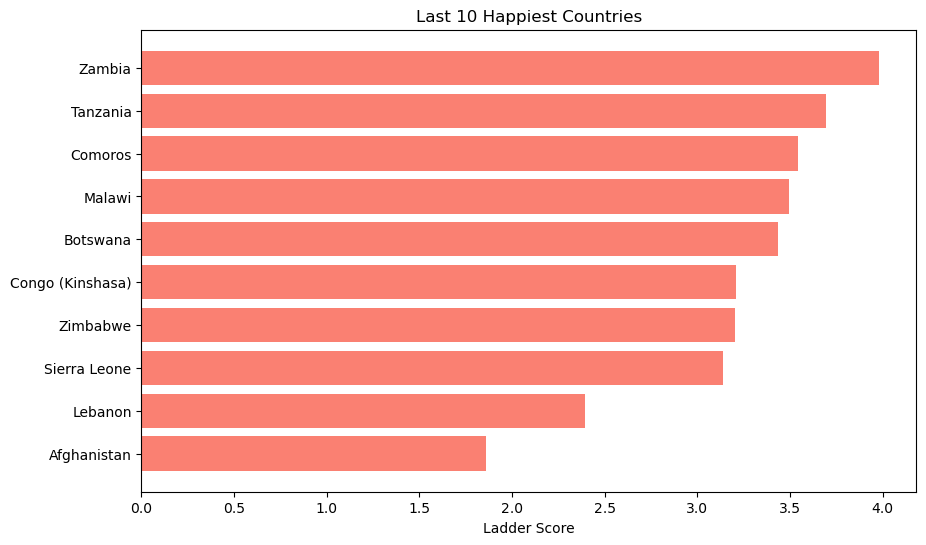

In [42]:
# Data for last 10 happiest countries
last_10_countries = top_happiness_countries.tail(10)
countries_last = last_10_countries['Country name']
scores_last = last_10_countries['Ladder score']

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(countries_last, scores_last, color='salmon')
plt.xlabel('Ladder Score')
plt.title('Last 10 Happiest Countries')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest score at the top
plt.show()


In [45]:
# Sort the DataFrame by 'Ladder score' column in ascending order to get the last happiest countries
last_happiness_countries = df.sort_values(by='Ladder score', ascending=True)

# Select the columns 'Country name', 'Ladder score', and 'Continent' for display
last_happiness_countries = last_happiness_countries[['Country name', 'Ladder score', 'Continent']]

# Display the last 10 happiest countries along with their ladder scores and continents
print(last_happiness_countries.head(10))


         Country name  Ladder score Continent
136       Afghanistan         1.859      Asia
135           Lebanon         2.392      Asia
134      Sierra Leone         3.138    Africa
133          Zimbabwe         3.204    Africa
132  Congo (Kinshasa)         3.207    Africa
131          Botswana         3.435    Africa
130            Malawi         3.495    Africa
129           Comoros         3.545    Africa
128          Tanzania         3.694    Africa
127            Zambia         3.982    Africa


In [48]:
# Filter the DataFrame to include only African countries
african_countries = df[df['Continent'] == 'Africa']

# Sort the filtered DataFrame by 'Ladder score' column in descending order to get the top happiest African countries
top_african_happiness = african_countries.sort_values(by='Ladder score', ascending=False)

# Select the columns 'Country name', 'Ladder score', and 'Continent' for display
top_african_happiness = top_african_happiness[['Country name', 'Ladder score', 'Continent']]

# Display the top 5 happiest African countries along with their ladder scores and continent
print(top_african_happiness.head(10))


           Country name  Ladder score Continent
58            Mauritius         5.902    Africa
80              Algeria         5.329    Africa
84         South Africa         5.275    Africa
85  Congo (Brazzaville)         5.267    Africa
90               Guinea         5.072    Africa
92          Ivory Coast         5.053    Africa
93                Gabon         5.035    Africa
94              Nigeria         4.981    Africa
95             Cameroon         4.973    Africa
96           Mozambique         4.954    Africa


   Country name  Ladder score
0       Finland         7.804
1       Denmark         7.586
2       Iceland         7.530
4   Netherlands         7.403
5        Sweden         7.395
6        Norway         7.315
7   Switzerland         7.240
8    Luxembourg         7.228
10      Austria         7.097
13      Ireland         6.911


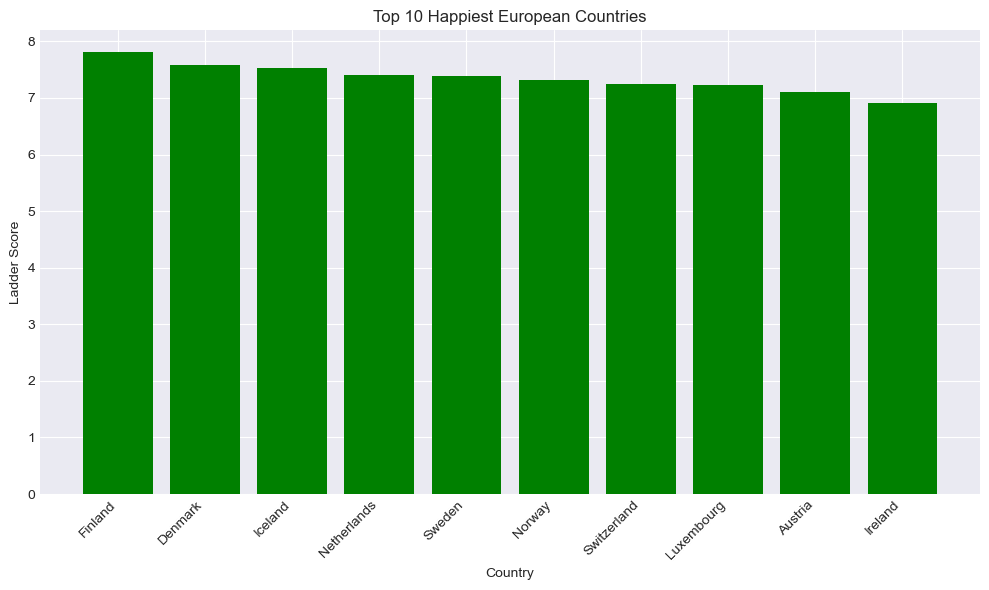

In [54]:
# Filter the DataFrame to include only European countries and select the top 10 happiest
top_european_happiness = df[df['Continent'] == 'Europe'].nlargest(10, 'Ladder score')

# Print the top 10 happiest European countries
print(top_european_happiness[['Country name', 'Ladder score']])

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_european_happiness['Country name'], top_european_happiness['Ladder score'], color='green')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Ladder Score')
plt.title('Top 10 Happiest European Countries')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


              Country name  Ladder score
91                 Ukraine         5.071
89                 Georgia         5.109
86         North Macedonia         5.254
82                 Albania         5.277
78                 Armenia         5.342
76                Bulgaria         5.466
70  Bosnia and Herzegovina         5.633
66              Montenegro         5.722
62                 Moldova         5.819
57                  Greece         5.931


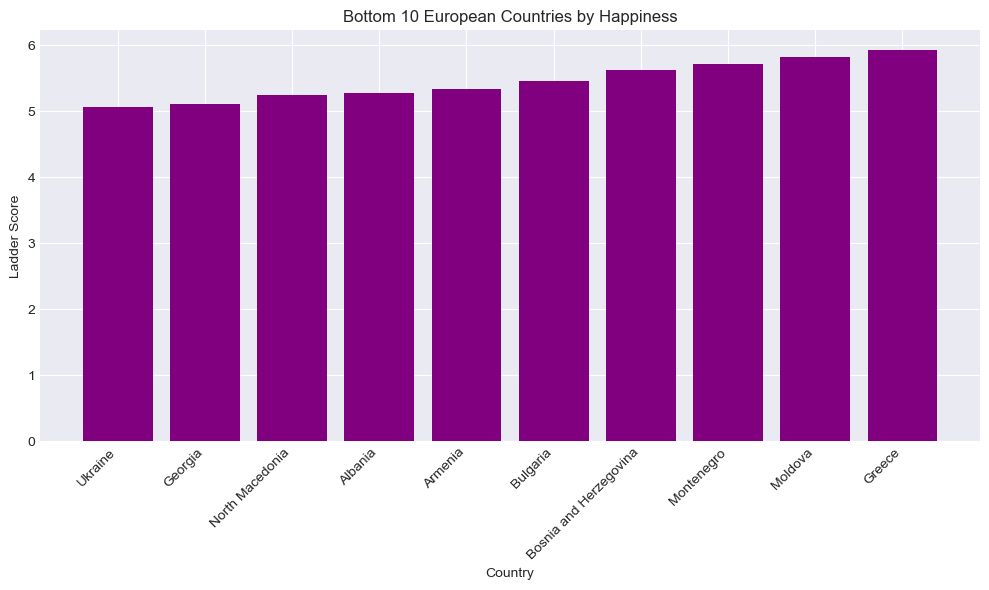

In [55]:
# Filter the DataFrame to include only European countries and select the bottom 10 by ladder score
bottom_european_happiness = df[df['Continent'] == 'Europe'].nsmallest(10, 'Ladder score')

# Print the bottom 10 European countries
print(bottom_european_happiness[['Country name', 'Ladder score']])

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(bottom_european_happiness['Country name'], bottom_european_happiness['Ladder score'], color='purple')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Ladder Score')
plt.title('Bottom 10 European Countries by Happiness')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


                Country name  Ladder score
3                     Israel         7.473
24                 Singapore         6.587
25      United Arab Emirates         6.571
26  Taiwan Province of China         6.535
29              Saudi Arabia         6.463
41                   Bahrain         6.173
43                Kazakhstan         6.144
46                     Japan         6.129
53                Uzbekistan         6.014
54                  Malaysia         6.012


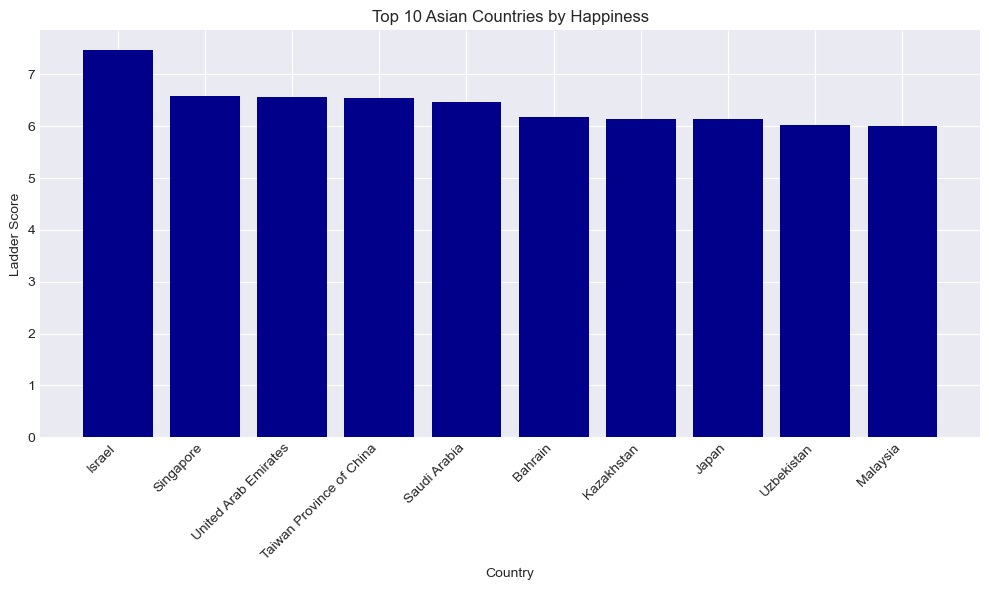

In [57]:
# Filter the DataFrame to include only Asian countries and select the top 10 by ladder score
top_asian_happiness = df[df['Continent'] == 'Asia'].nlargest(10, 'Ladder score')

# Print the top 10 Asian countries
print(top_asian_happiness[['Country name', 'Ladder score']])

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_asian_happiness['Country name'], top_asian_happiness['Ladder score'], color='darkblue')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Ladder Score')
plt.title('Top 10 Asian Countries by Happiness')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


    Country name  Ladder score
136  Afghanistan         1.859
135      Lebanon         2.392
125        India         4.036
122       Jordan         4.120
117   Bangladesh         4.282
116      Myanmar         4.372
114     Cambodia         4.393
111    Sri Lanka         4.442
107     Pakistan         4.555
105      Turkiye         4.614


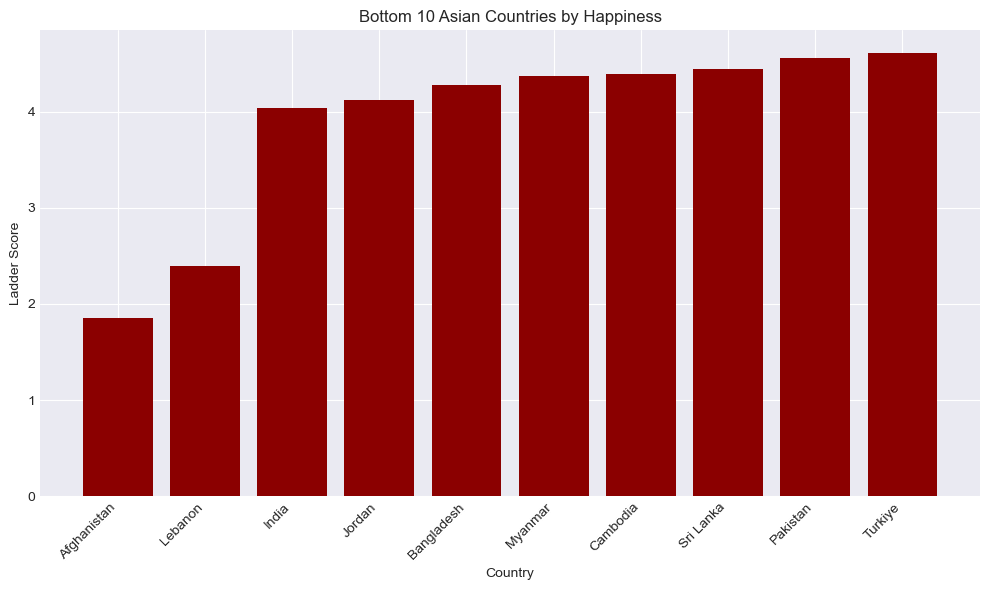

In [60]:
# Filter the DataFrame to include only Asian countries and select the bottom 10 by ladder score
bottom_asian_happiness = df[df['Continent'] == 'Asia'].nsmallest(10, 'Ladder score')

# Print the bottom 10 Asian countries
print(bottom_asian_happiness[['Country name', 'Ladder score']])

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(bottom_asian_happiness['Country name'], bottom_asian_happiness['Ladder score'], color='darkred')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Ladder Score')
plt.title('Bottom 10 Asian Countries by Happiness')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


           Country name  Ladder score Continent
58            Mauritius         5.902    Africa
80              Algeria         5.329    Africa
84         South Africa         5.275    Africa
85  Congo (Brazzaville)         5.267    Africa
90               Guinea         5.072    Africa
92          Ivory Coast         5.053    Africa
93                Gabon         5.035    Africa
94              Nigeria         4.981    Africa
95             Cameroon         4.973    Africa
96           Mozambique         4.954    Africa


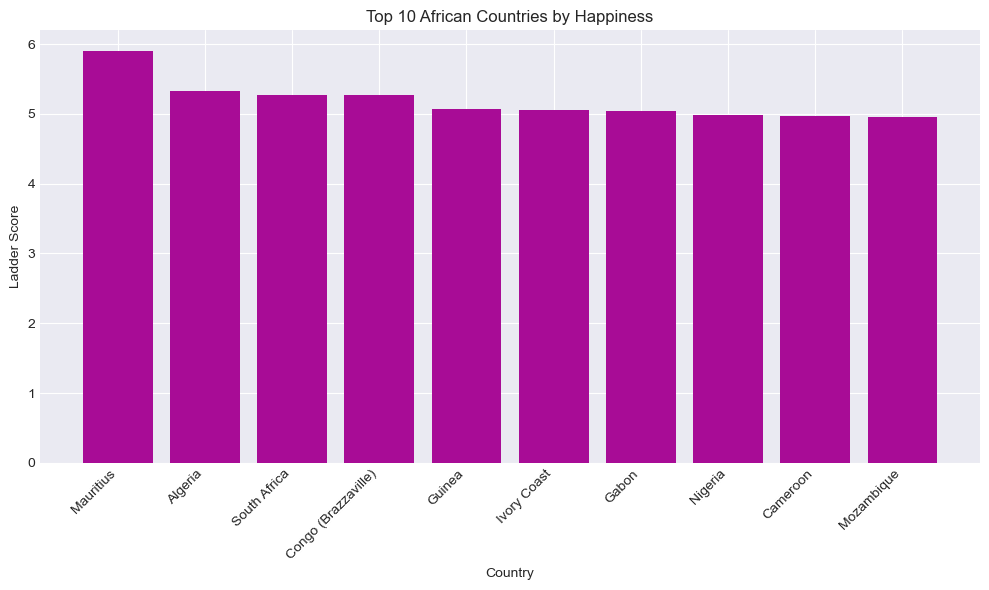

In [63]:
# Filter the DataFrame to include only African countries and select the top 10 by ladder score
top_african_happiness = df[df['Continent'] == 'Africa'].nlargest(10, 'Ladder score')

# Print the top 10 African countries
print(top_african_happiness[['Country name', 'Ladder score','Continent']])

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_african_happiness['Country name'], top_african_happiness['Ladder score'], color='#a80c96')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Ladder Score')
plt.title('Top 10 African Countries by Happiness')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


         Country name  Ladder score
134      Sierra Leone         3.138
133          Zimbabwe         3.204
132  Congo (Kinshasa)         3.207
131          Botswana         3.435
130            Malawi         3.495
129           Comoros         3.545
128          Tanzania         3.694
127            Zambia         3.982
126        Madagascar         4.019
124           Liberia         4.042


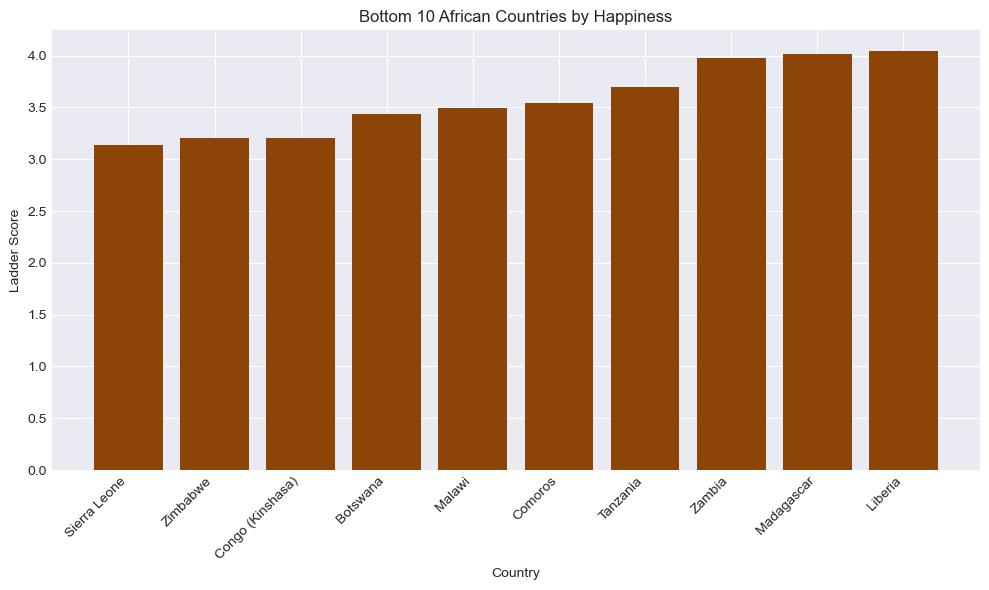

In [64]:
# Filter the DataFrame to include only African countries and select the bottom 10 by ladder score
bottom_african_happiness = df[df['Continent'] == 'Africa'].nsmallest(10, 'Ladder score')

# Print the bottom 10 African countries
print(bottom_african_happiness[['Country name', 'Ladder score']])

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(bottom_african_happiness['Country name'], bottom_african_happiness['Ladder score'], color='#8c4507')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Ladder Score')
plt.title('Bottom 10 African Countries by Happiness')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


         Country name  Ladder score
110             Kenya         4.487
112            Uganda         4.432
128          Tanzania         3.694
132  Congo (Kinshasa)         3.207


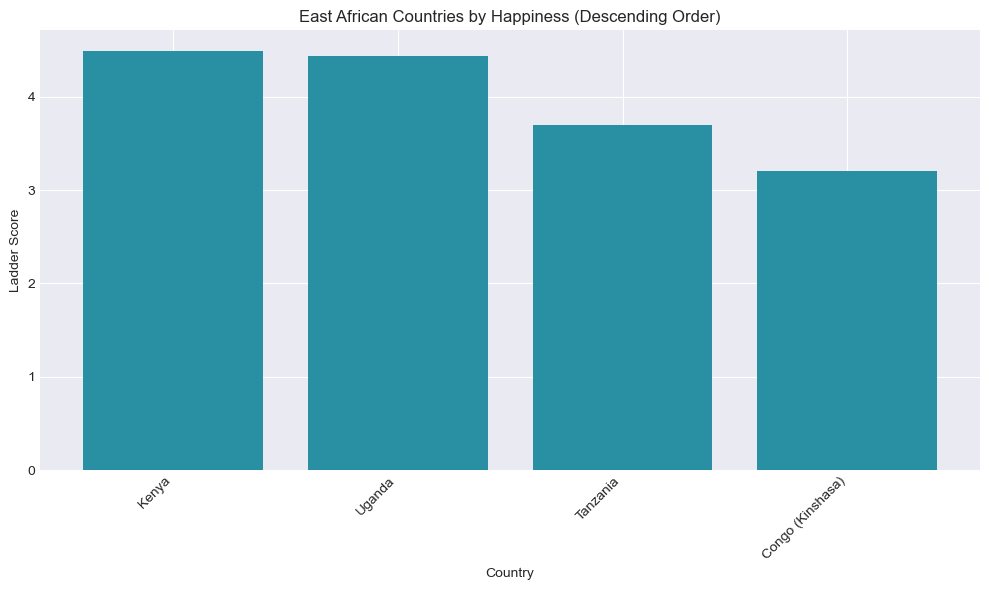

In [65]:
# Define the list of East African countries
east_african_countries = ['Tanzania', 'Kenya', 'Uganda', 'Rwanda', 'Burundi', 'Somalia', 'Congo (Kinshasa)']

# Filter the DataFrame to include only the East African countries and select them
east_african_df = df[df['Country name'].isin(east_african_countries)]

# Sort the East African DataFrame by ladder score in descending order
east_african_df = east_african_df.sort_values(by='Ladder score', ascending=False)

# Print the East African countries in descending order based on ladder score
print(east_african_df[['Country name', 'Ladder score']])

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(east_african_df['Country name'], east_african_df['Ladder score'], color='#298fa3')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Ladder Score')
plt.title('East African Countries by Happiness (Descending Order)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


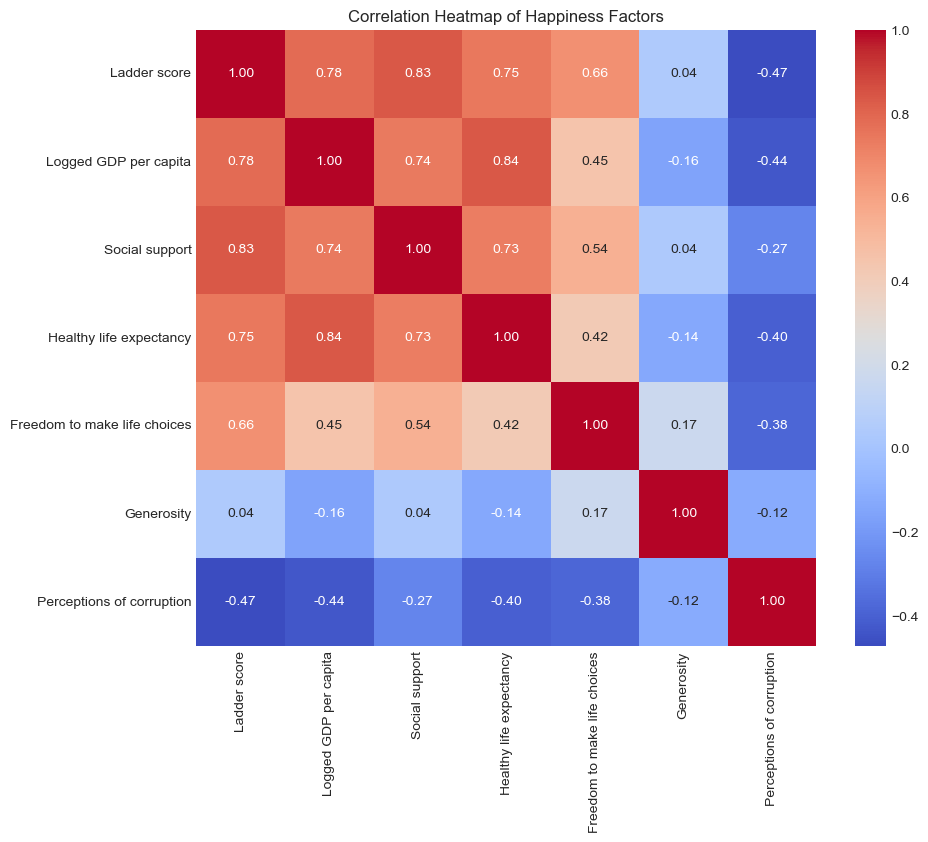

In [68]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df[['Ladder score', 'Logged GDP per capita', 'Social support', 
                         'Healthy life expectancy', 'Freedom to make life choices', 
                         'Generosity', 'Perceptions of corruption']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Happiness Factors')
plt.show()


In [69]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                            Ladder score  \
Ladder score                                    1.000000   
Standard error of ladder score                 -0.512628   
upperwhisker                                    0.999401   
lowerwhisker                                    0.999448   
Logged GDP per capita                           0.784367   
Social support                                  0.834532   
Healthy life expectancy                         0.746928   
Freedom to make life choices                    0.662924   
Generosity                                      0.044082   
Perceptions of corruption                      -0.471911   
Ladder score in Dystopia                             NaN   
Explained by: Log GDP per capita                0.784342   
Explained by: Social support                    0.834604   
Explained by: Healthy life expectancy           0.746699   
Explained by: Freedom to make life choices      0.662909   
Explained by: Genero

C:\Users\FREDDY\AppData\Local\Temp\ipykernel_28328\3695439728.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


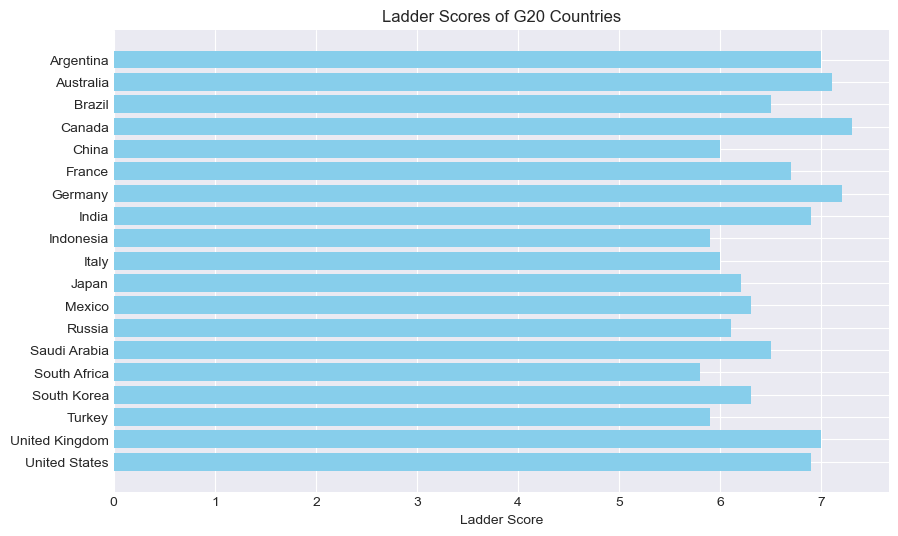

In [70]:
import matplotlib.pyplot as plt

# Define the G20 countries and their corresponding ladder scores
g20_countries = ["Argentina", "Australia", "Brazil", "Canada", "China", "France", "Germany", 
                 "India", "Indonesia", "Italy", "Japan", "Mexico", "Russia", "Saudi Arabia", 
                 "South Africa", "South Korea", "Turkey", "United Kingdom", "United States"]
ladder_scores = [7.0, 7.1, 6.5, 7.3, 6.0, 6.7, 7.2, 6.9, 5.9, 6.0, 6.2, 6.3, 6.1, 6.5, 5.8, 6.3, 5.9, 7.0, 6.9]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(g20_countries, ladder_scores, color='skyblue')
plt.xlabel('Ladder Score')
plt.title('Ladder Scores of G20 Countries')
plt.gca().invert_yaxis()  # Invert y-axis to display countries from top to bottom
plt.show()
